# Correlation Heatmaps

## Trevor Rowland, Scott Campbell :: 2-4-2025

This notebook serves as a repository of functions for creating correlation heatmaps, used to identify relationships between features in our datasets. This notebook will use the `players` dataset, containing aggregated player stats for all NBA players from 2004-2024.

## 1. Importing Packages and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('/Users/dB/Documents/repos/github/bint-capstone/data-sources/nba/new-player-data.pkl')
df.head()

,id,playerName,position,age,games,gamesStarted,minutesPg,fieldGoals,fieldAttempts,fieldPercent,...,totalRb,assists,steals,blocks,turnovers,personalFouls,points,team,season,playerId
0,10236,Marcus Camby,C,32,70,70,2369,312,659,0.473,...,816,223,87,231,122,183,785,DEN,2007,cambyma01
1,10159,Shareef Abdur-Rahim,C,30,80,45,2015,310,654,0.474,...,398,109,53,40,116,243,793,SAC,2007,abdursh01
2,10160,Hassan Adams,SG,22,61,8,495,75,135,0.556,...,77,13,17,4,22,47,174,NJN,2007,adamsha01
3,10161,Maurice Ager,SG,22,32,1,214,22,70,0.314,...,21,7,4,3,15,27,69,DAL,2007,agerma01
4,10162,LaMarcus Aldridge,C,21,63,22,1392,241,479,0.503,...,312,24,22,73,43,186,565,POR,2007,aldrila01


## 2. Removing Unnecessary Data

Now we need to remove data that will screw up the process of creating dummy variables and the correlation heatmap.

In [3]:
print(df.columns.tolist())

['id', 'playerName', 'position', 'age', 'games', 'gamesStarted', 'minutesPg', 'fieldGoals', 'fieldAttempts', 'fieldPercent', 'threeFg', 'threeAttempts', 'threePercent', 'twoFg', 'twoAttempts', 'twoPercent', 'effectFgPercent', 'ft', 'ftAttempts', 'ftPercent', 'offensiveRb', 'defensiveRb', 'totalRb', 'assists', 'steals', 'blocks', 'turnovers', 'personalFouls', 'points', 'team', 'season', 'playerId']


We will be removing id, playerName, team, and playerId.

In [4]:
df = df.drop(['id','playerName','team','playerId'], axis=1)

Now we can create the dummy variables, the correlation matrix, and display a correlation heatmap for the player data.

To create the dummy variables, we will use `pd.get_dummies()` (be mindful of how many categories you have, this can make the corr. matrix take an extremely long time to run if there are too many).

To create the correlation matrix, we will use `pd.DataFrame.corr()`.

Lastly, for plotting we will use `matplotlib` and `seaborn`.

In [5]:
# Add Dummy Vars to df
df_w_dummies = pd.get_dummies(df, columns=['position'], drop_first=True)
df_w_dummies.head()

,age,games,gamesStarted,minutesPg,fieldGoals,fieldAttempts,fieldPercent,threeFg,threeAttempts,threePercent,...,position_PG-SG,position_SF,position_SF-C,position_SF-PF,position_SF-SG,position_SG,position_SG-PF,position_SG-PG,position_SG-PG-SF,position_SG-SF
0,32,70,70,2369,312,659,0.473,0,2,0.000,...,False,False,False,False,False,False,False,False,False,False
1,30,80,45,2015,310,654,0.474,3,20,0.150,...,False,False,False,False,False,False,False,False,False,False
2,22,61,8,495,75,135,0.556,0,1,0.000,...,False,False,False,False,False,True,False,False,False,False
3,22,32,1,214,22,70,0.314,5,15,0.333,...,False,False,False,False,False,True,False,False,False,False
4,21,63,22,1392,241,479,0.503,0,2,0.000,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Create the Correlation Matrix
matrix_spearman = df_w_dummies.corr(method='spearman')
matrix_kendall = df_w_dummies.corr(method='kendall')
matrix_pearson = df_w_dummies.corr(method='pearson')


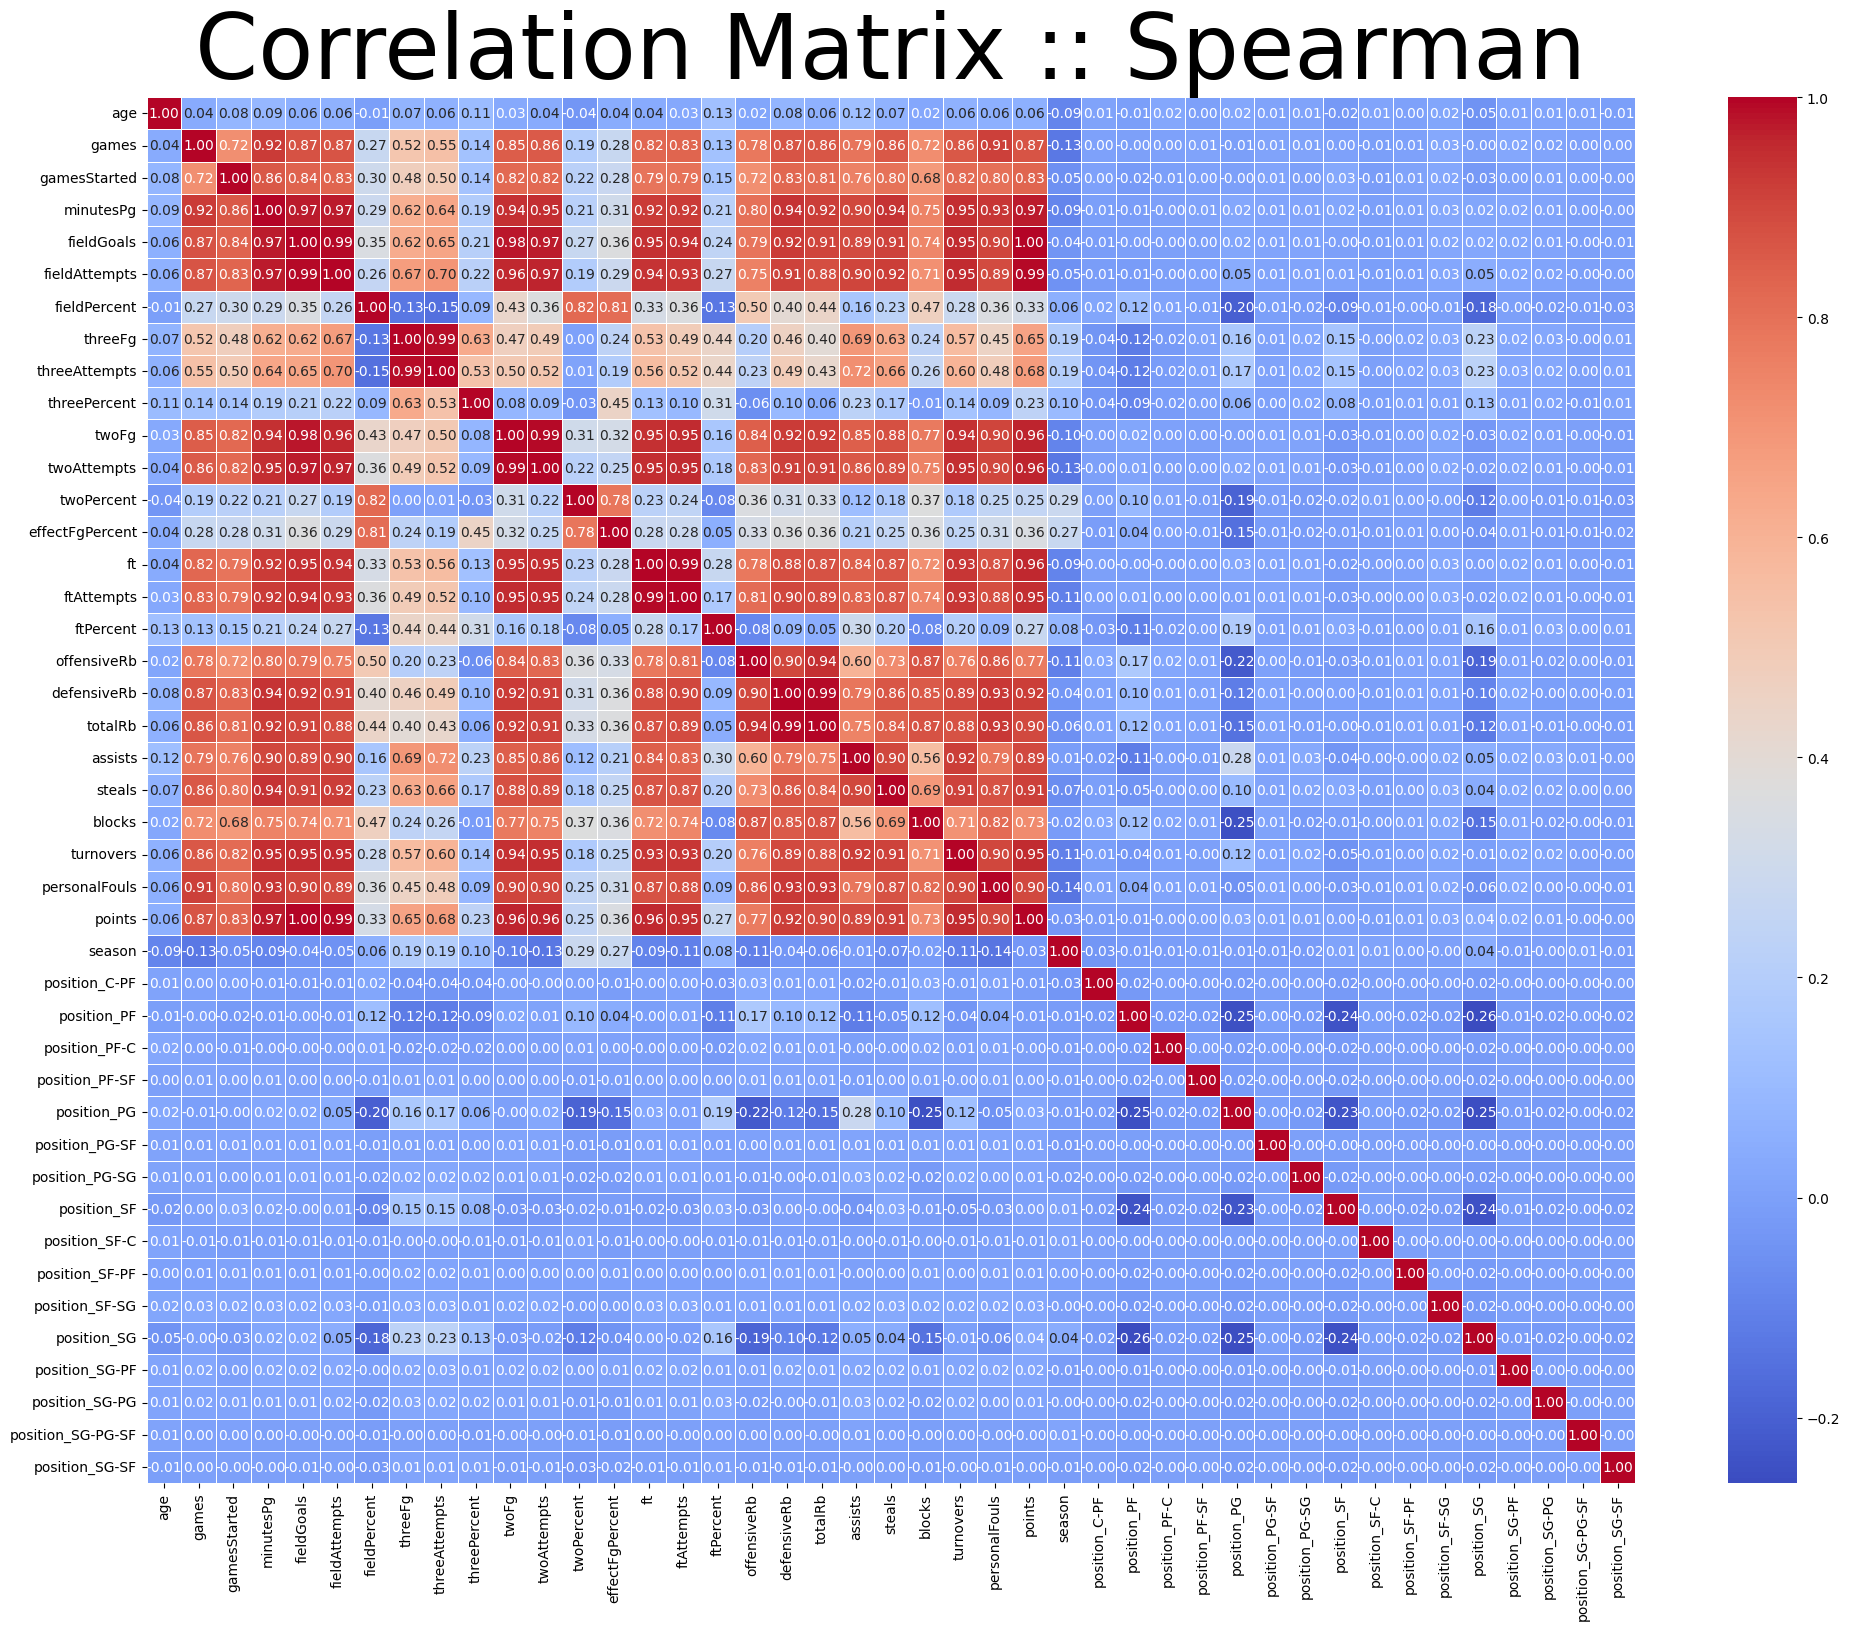

In [11]:
# Plot the Correlation Matrix
plt.figure(figsize=(24, 18))
sns.heatmap(matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix :: Spearman", fontsize=65)
plt.show()

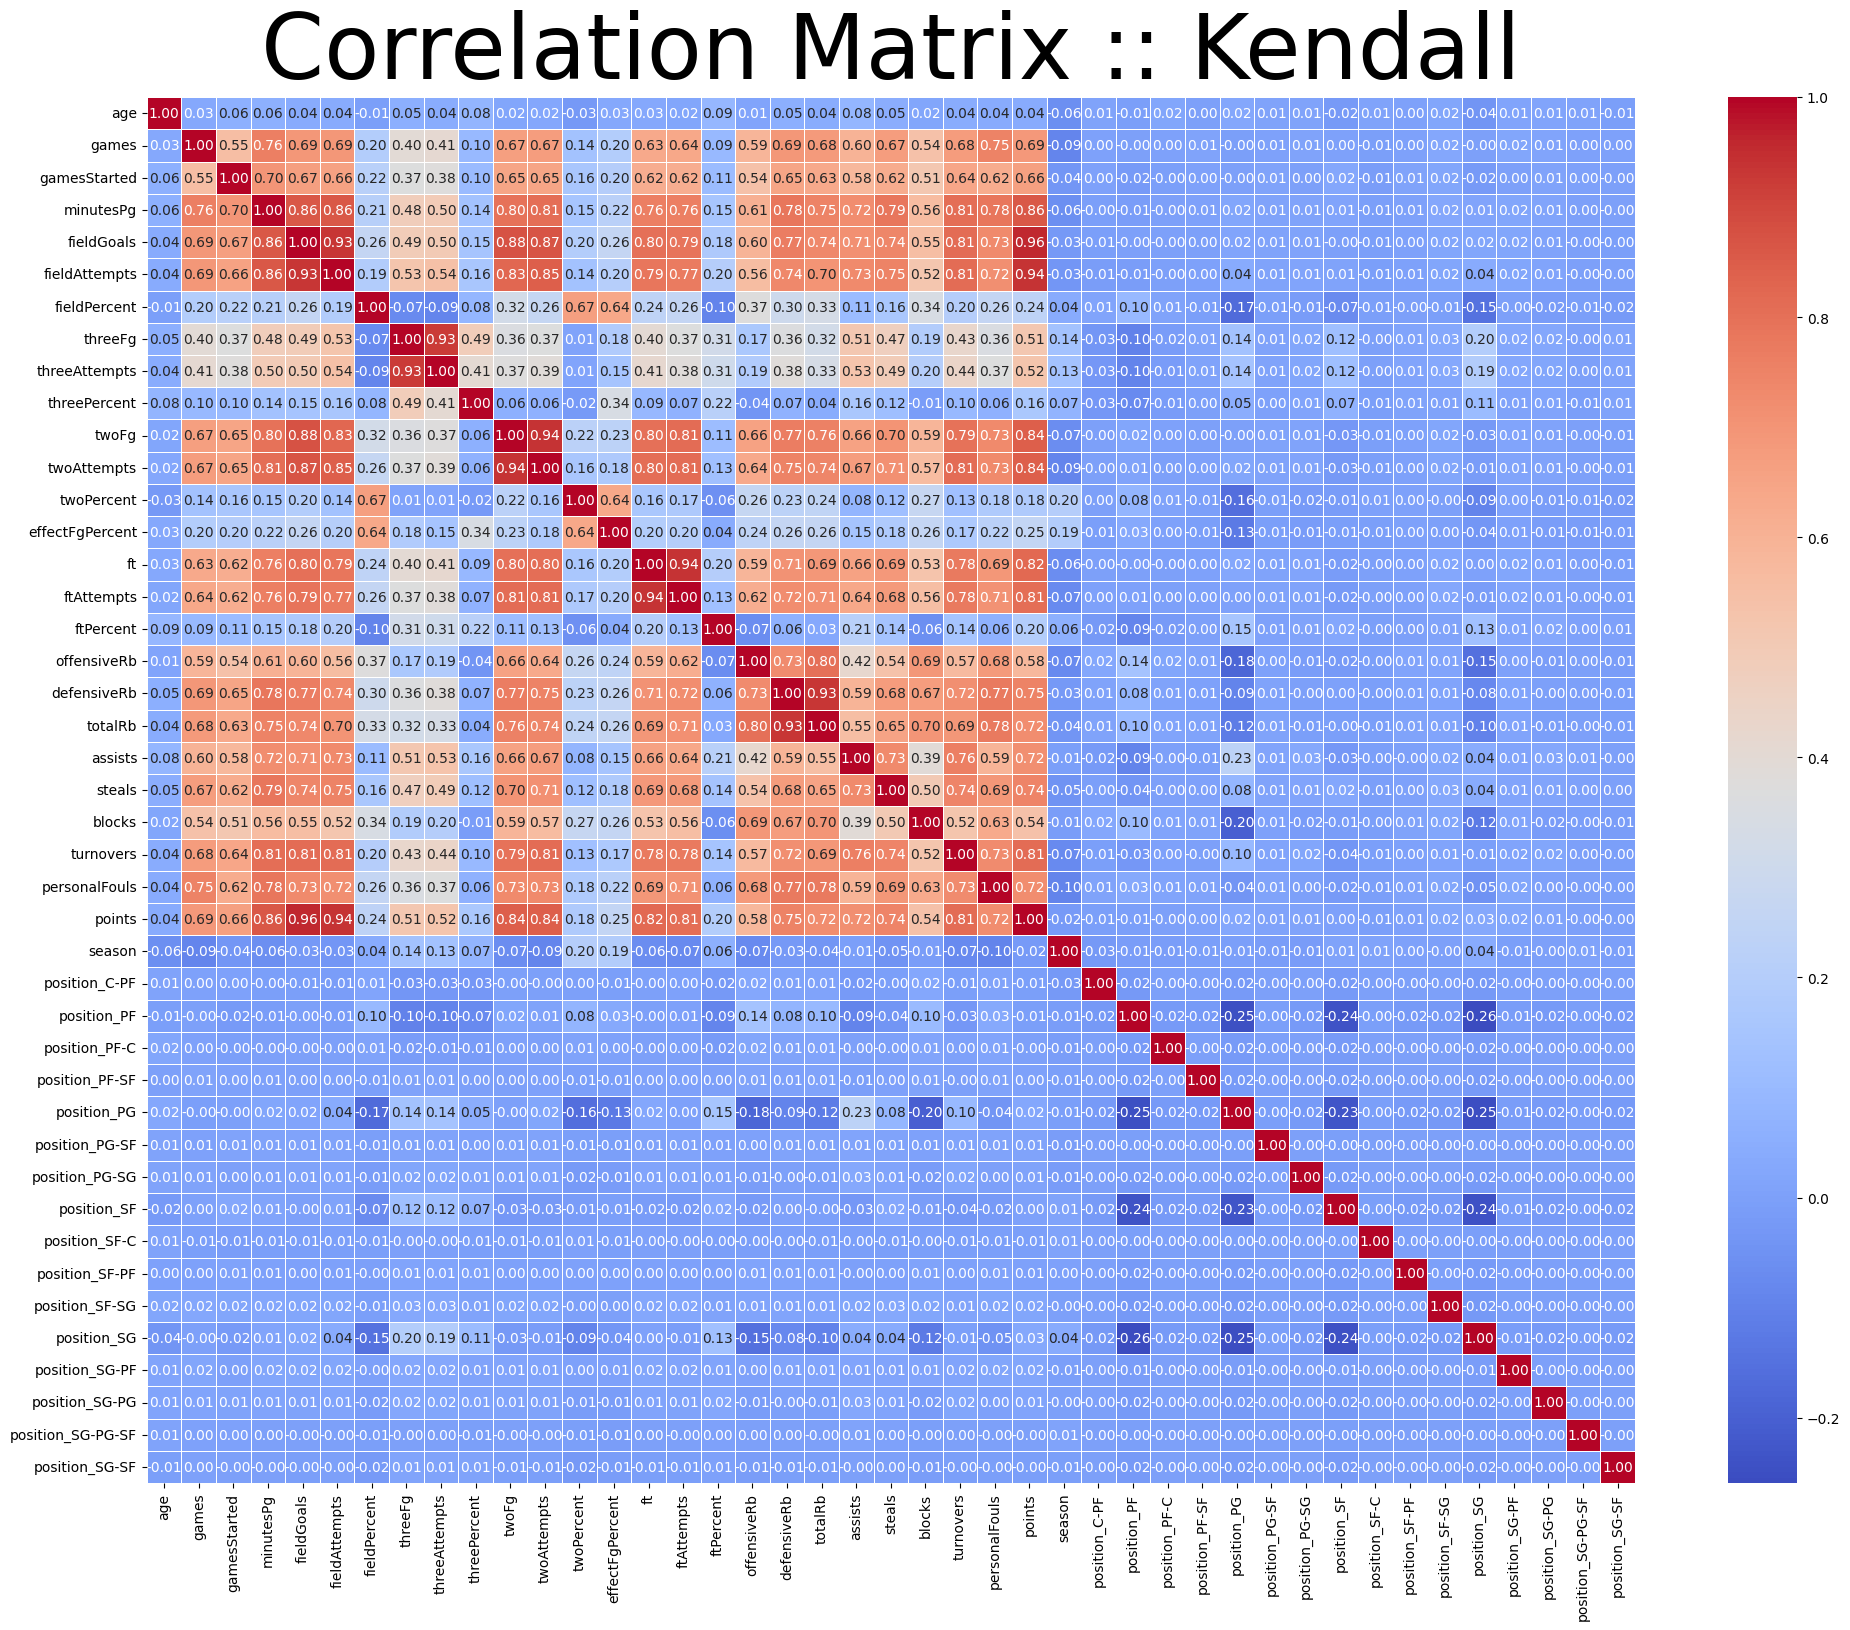

In [12]:
# Plot the Correlation Matrix
plt.figure(figsize=(24, 18))
sns.heatmap(matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix :: Kendall", fontsize=65)
plt.show()

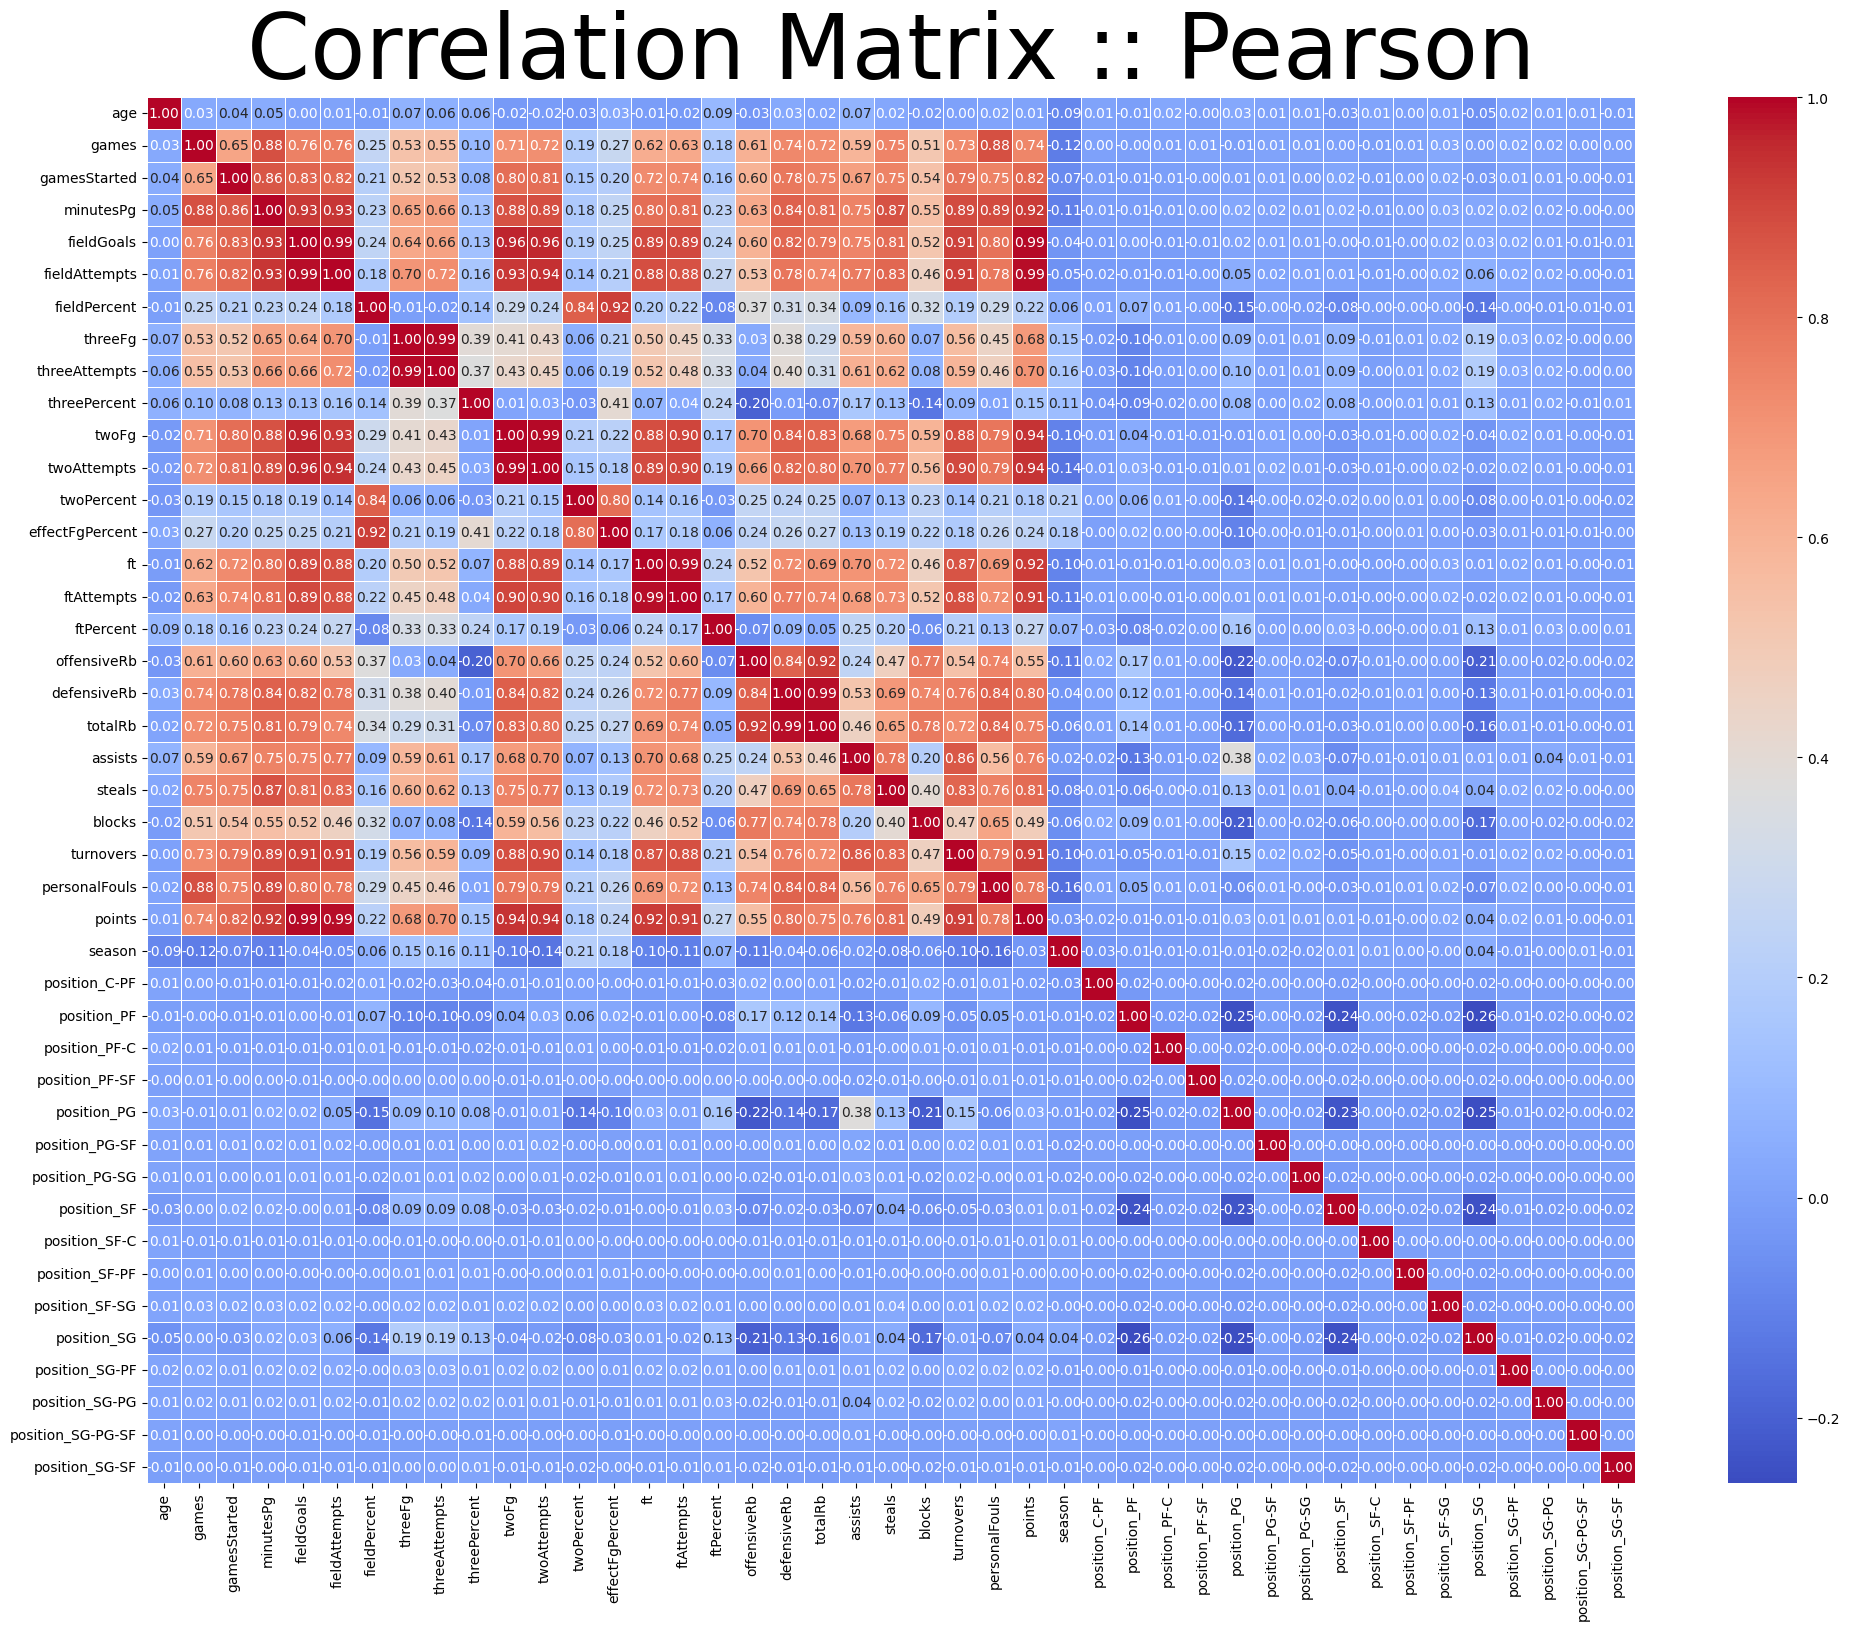

In [13]:
# Plot the Correlation Matrix
plt.figure(figsize=(24, 18))
sns.heatmap(matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix :: Pearson", fontsize=65)
plt.show()